# Overview

Use this as a template for building PyTorch models.

In [1]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch
import torch.nn as nn
import torchvision

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Create PyTorch DataLoader

In [2]:
class FrequencyDataset(Dataset):
    "Frequency measurements data."
    
    def __init__(self, features, targets):
        'Initialization.'
        self.X = np.array(features)
        self.Y = np.array(targets)
        self.sample_index = np.shape(features)[0]
        
    def __len__(self):
        'Denotes the total number of samples.'
        return self.sample_index
    
    def __getitem__(self, index):
        'Generates a sample of data.'
        # Select index of sample.
        X_sample = X[index]
        Y_sample = Y[index]
        
        return X_sample, Y_sample

# Create Synthetic Data

In [53]:
#X = np.random.uniform(0,1,(1000,5))
#Y = np.where(np.mean(X, axis=1)<0.5, 0, 1)

X = np.arange(1000)+1
Y = X % 4
X = np.reshape(X, (-1, 1))

X_train = X[0:500]
Y_train = Y[0:500]

X_val = X[500:]
Y_val = Y[500:]

print(X[0:5])
print(Y[0:5])

[[1]
 [2]
 [3]
 [4]
 [5]]
[1 2 3 0 1]


# Hyperparameters

In [54]:
params = {'batch_size': 8,
          'shuffle': True
         }

input_size = 1
hidden_size = 128
num_classes = 4
num_epochs = 50
batch_size = 100
learning_rate = 0.001

# Define and Train MLP

In [55]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

training_set = FrequencyDataset(X_train.astype(np.float64), Y_train)
training_generator = DataLoader(training_set, **params)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size) 
        self.fc3 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device).double()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(training_generator)

loss_per_epoch_train = []
ccuracy_per_epoch_train = []
loss_per_epoch_val = []
accuracy_per_epoch_val = []

X_val = torch.from_numpy(X_val).to(device).double()
Y_val = torch.from_numpy(Y_val).to(device)

for epoch in range(num_epochs):
    
    for i, (X_batch, Y_batch) in enumerate(training_generator):  
        # Move tensors to the configured device
        X_batch = X_batch.to(device).double()
        Y_batch = Y_batch.to(device)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Display training stats and save metrics.
        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            loss_per_epoch_train.append(loss.item())
        
            class_predictions_train = np.argmax(outputs.detach().numpy(), axis=1)
            accuracy = np.mean(class_predictions_train == Y_batch.detach().numpy())
            accuracy_per_epoch.append(accuracy)
            
            outputs_val = model(X_val)
            loss_val = criterion(outputs_val, Y_val)
            loss_per_epoch_val.append(loss_val)
            
            class_predictions_val = np.argmax(outputs_val.detach().numpy(), axis=1)
            accuracy_val = np.mean(class_predictions_val == Y_val.detach().numpy())
            accuracy_per_epoch_val.append(accuracy_val)

Epoch [1/50], Step [10/63], Loss: 3.8369
Epoch [1/50], Step [20/63], Loss: 2.8602
Epoch [1/50], Step [30/63], Loss: 1.6955
Epoch [1/50], Step [40/63], Loss: 5.7766
Epoch [1/50], Step [50/63], Loss: 1.9627
Epoch [1/50], Step [60/63], Loss: 8.0862
Epoch [2/50], Step [10/63], Loss: 3.9032
Epoch [2/50], Step [20/63], Loss: 1.2492
Epoch [2/50], Step [30/63], Loss: 1.6561
Epoch [2/50], Step [40/63], Loss: 2.3002
Epoch [2/50], Step [50/63], Loss: 1.3186
Epoch [2/50], Step [60/63], Loss: 13.7160
Epoch [3/50], Step [10/63], Loss: 3.9957
Epoch [3/50], Step [20/63], Loss: 3.5789
Epoch [3/50], Step [30/63], Loss: 3.0420
Epoch [3/50], Step [40/63], Loss: 6.4044
Epoch [3/50], Step [50/63], Loss: 2.6056
Epoch [3/50], Step [60/63], Loss: 2.6907
Epoch [4/50], Step [10/63], Loss: 7.3736
Epoch [4/50], Step [20/63], Loss: 1.9537
Epoch [4/50], Step [30/63], Loss: 4.9725
Epoch [4/50], Step [40/63], Loss: 4.6775
Epoch [4/50], Step [50/63], Loss: 3.7136
Epoch [4/50], Step [60/63], Loss: 2.9913
Epoch [5/50], S

Epoch [35/50], Step [10/63], Loss: 1.5006
Epoch [35/50], Step [20/63], Loss: 1.5490
Epoch [35/50], Step [30/63], Loss: 1.4838
Epoch [35/50], Step [40/63], Loss: 1.7806
Epoch [35/50], Step [50/63], Loss: 1.4608
Epoch [35/50], Step [60/63], Loss: 1.4215
Epoch [36/50], Step [10/63], Loss: 1.6411
Epoch [36/50], Step [20/63], Loss: 1.5143
Epoch [36/50], Step [30/63], Loss: 1.8157
Epoch [36/50], Step [40/63], Loss: 1.3450
Epoch [36/50], Step [50/63], Loss: 1.6633
Epoch [36/50], Step [60/63], Loss: 1.3638
Epoch [37/50], Step [10/63], Loss: 1.2892
Epoch [37/50], Step [20/63], Loss: 1.6457
Epoch [37/50], Step [30/63], Loss: 1.7569
Epoch [37/50], Step [40/63], Loss: 1.5022
Epoch [37/50], Step [50/63], Loss: 1.4895
Epoch [37/50], Step [60/63], Loss: 1.2680
Epoch [38/50], Step [10/63], Loss: 1.2790
Epoch [38/50], Step [20/63], Loss: 1.6117
Epoch [38/50], Step [30/63], Loss: 1.3153
Epoch [38/50], Step [40/63], Loss: 1.4298
Epoch [38/50], Step [50/63], Loss: 1.4207
Epoch [38/50], Step [60/63], Loss:

# Visualise Training Metrics

Text(0, 0.5, 'Cross-entropy loss')

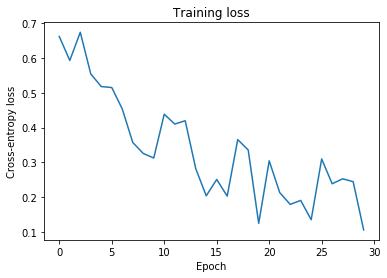

In [56]:
plt.plot(loss_per_epoch)
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy loss")

Text(0, 0.5, 'Accuracy')

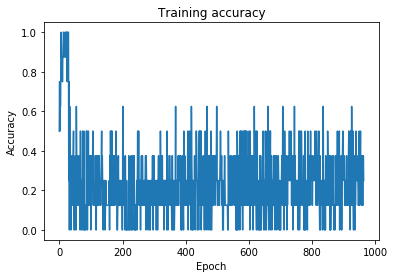

In [57]:
plt.plot(accuracy_per_epoch)
plt.title("Training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")